In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

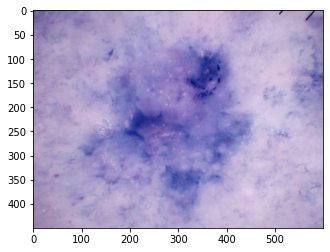

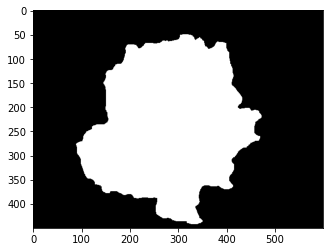

In [10]:
train_dir = "C:/Users/isaac/Documents/Programming/Skin Cancer Analysis and Predictions/dataverse_files/train"
test_dir = "C:/Users/isaac/Documents/Programming/Skin Cancer Analysis and Predictions/dataverse_files/test"
segment_dir = "C:/Users/isaac/Documents/Programming/Skin Cancer Analysis and Predictions/dataverse_files/HAM10000_segmentations_lesion_tschandl"

test_img = cv2.imread(os.path.join(train_dir,"akiec/ISIC_0024372.jpg"),cv2.IMREAD_COLOR)
test_seg = cv2.imread(os.path.join(segment_dir,"ISIC_0024372_segmentation.png"),cv2.IMREAD_GRAYSCALE)
plt.imshow(test_img)
plt.show()
plt.imshow(test_seg,cmap="gray")
plt.show()

In [14]:
def segment_map(img,seg):
    for row_num in range(len(seg)):
        for col_num in range(len(seg[0])):
            if seg[row_num][col_num]==0:
                img[row_num][col_num] = [0,0,0]
    return img

In [15]:
seg_func = np.vectorize(segment_map)

In [18]:
combined = segment_map(test_img,test_seg)

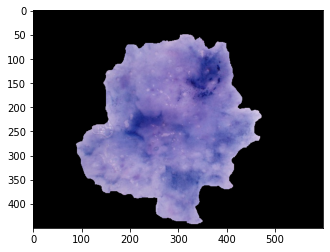

In [19]:
plt.imshow(combined)

### Now for creating all these in new directory

In [32]:
new_base_dir = "C:/Users/isaac/Documents/Programming/Skin Cancer Analysis and Predictions/dataverse_files/original_with_segmentation"
base_dir = "C:/Users/isaac/Documents/Programming/Skin Cancer Analysis and Predictions/dataverse_files"
dirs = ["train","test"]

for directory in dirs:
    
    directory_path = os.path.join(base_dir,directory)
    train_test_dir = os.path.join(new_base_dir,directory)

    if not os.path.exists(train_test_dir):
        os.makedirs(train_test_dir)
 
    for label in os.listdir(directory_path):
        
        folder_path = os.path.join(directory_path,label)
        new_label_path = os.path.join(train_test_dir,label)

        if not os.path.exists(new_label_path):
            os.makedirs(new_label_path)

        for image_name in os.listdir(folder_path):
            
            ### image_name form is ISIC0012345.jpg. segment_name is ISIC0012345_segmentation.png
            filepath = os.path.join(folder_path,image_name)
            segment_image_path = os.path.join(segment_dir,image_name[:-4]+"_segmentation.png")
            new_image_path = os.path.join(new_label_path,image_name)
            
            curr_image = cv2.imread(filepath,cv2.IMREAD_COLOR)
            segment_image = cv2.imread(segment_image_path,cv2.IMREAD_GRAYSCALE)
            
            curr_image = segment_map(curr_image,segment_image)
            
            ### save image to new dir
            cv2.imwrite(new_image_path,curr_image)

In [38]:
old = cv2.imread(os.path.join(train_dir,"nv","ISIC_0024391.jpg"))
new = cv2.imread(os.path.join(new_base_dir,"train","nv","ISIC_0024391.jpg"))

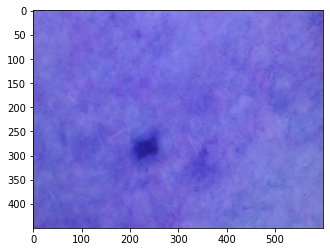

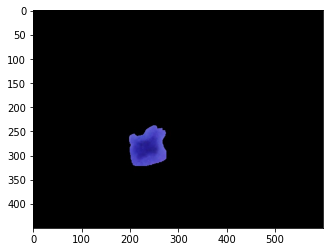

In [39]:
plt.imshow(old)
plt.show()
plt.imshow(new)
plt.show()